In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Линейная регрессия

In [ ]:
# Загрузка данных
data = pd.read_csv('/content/apple_quality.csv')

# Просмотр структуры данных
data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


In [ ]:
data.drop(columns=['A_id'], inplace=True)

In [ ]:
unique_values = data['Quality'].value_counts()
print("Количество уникальных значений:", len(unique_values))

Количество уникальных значений: 2


In [ ]:
value_to_numeric = {value: index for index, value in enumerate(unique_values.index)}
data_transformed = data.copy()
data_transformed['Quality'] = data['Quality'].map(value_to_numeric)

In [ ]:
data_transformed.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,0
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,0
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,1
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,0
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,0


+Пирсона

In [ ]:
# Корреляционная матрица
correlation_matrix = data_transformed.corr()
correlation_matrix

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
Size,1.000000,-0.170702,-0.324680,0.169868,-0.018892,-0.134773,0.196218,-0.244007
Weight,-0.170702,1.000000,-0.154246,-0.095882,-0.092263,-0.243824,0.016414,-0.001421
Sweetness,-0.324680,-0.154246,1.000000,-0.037552,0.095882,-0.273800,0.085999,-0.250998
Crunchiness,0.169868,-0.095882,-0.037552,1.000000,-0.259607,-0.201982,0.069943,0.012376
Juiciness,-0.018892,-0.092263,0.095882,-0.259607,1.000000,-0.097144,0.248714,-0.260223
Ripeness,-0.134773,-0.243824,-0.273800,-0.201982,-0.097144,1.000000,-0.202669,0.264315
Acidity,0.196218,0.016414,0.085999,0.069943,0.248714,-0.202669,1.000000,0.007697
Quality,-0.244007,-0.001421,-0.250998,0.012376,-0.260223,0.264315,0.007697,1.000000


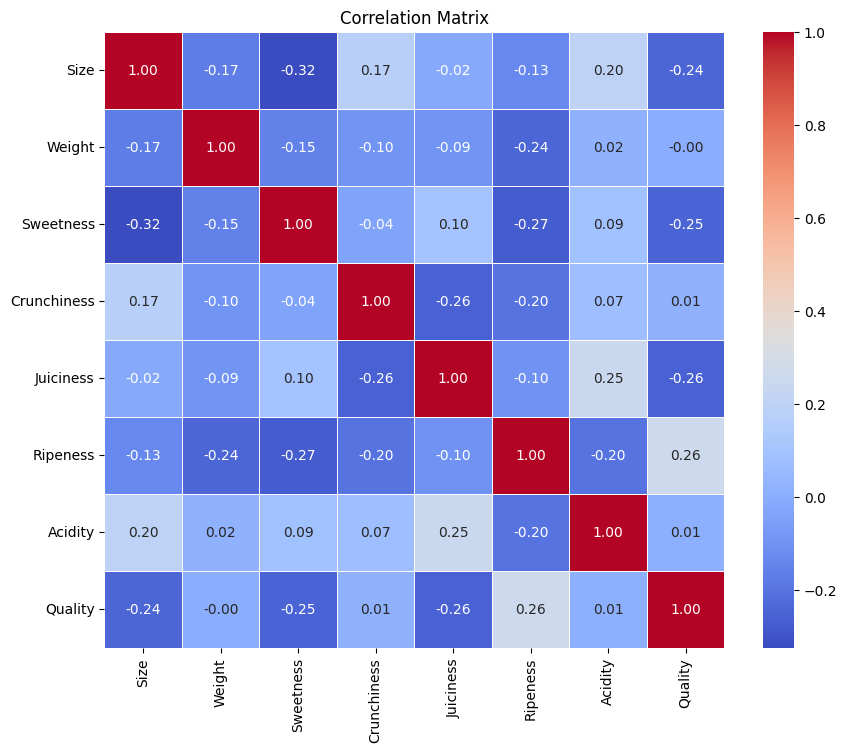

In [ ]:
# Визуализация корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

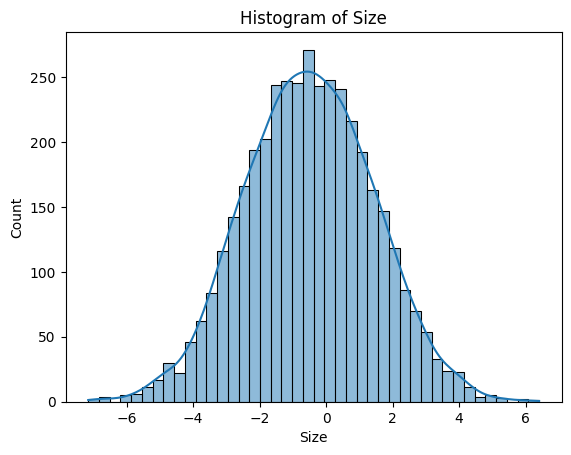

In [ ]:
# Проверка на нормальность распределения
sns.histplot(data_transformed['Size'], kde=True)
plt.title('Histogram of Size')
plt.show()

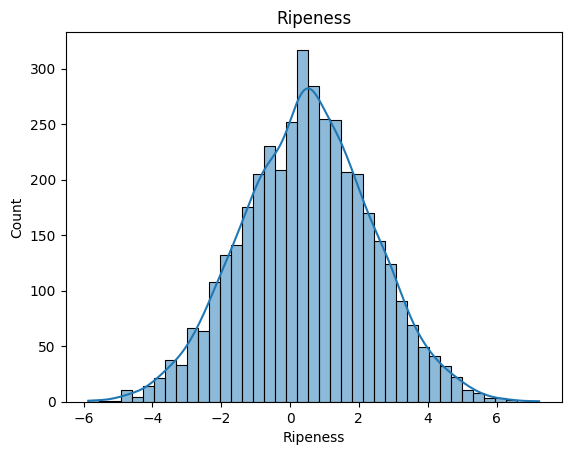

In [ ]:
sns.histplot(data_transformed['Ripeness'], kde=True)
plt.title('Ripeness')
plt.show()

In [ ]:
# Разделение данных на обучающий и тестовый наборы
X= data_transformed.drop(["Quality"],axis=1)
y= data_transformed["Quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Построение линейной регрессионной модели
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_train

3994    0
423     0
2991    1
1221    1
506     0
       ..
1130    0
1294    1
860     0
3507    0
3174    0
Name: Quality, Length: 3200, dtype: int64

In [ ]:
y_test

555     0
3491    1
527     1
3925    0
2989    1
       ..
1922    1
865     0
3943    0
1642    0
2483    0
Name: Quality, Length: 800, dtype: int64

In [ ]:
# Вывод коэффициентов регрессии
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients

,Coefficient
Size,-0.110687
Weight,-0.044754
Sweetness,-0.101023
Crunchiness,-0.005740
Juiciness,-0.077145
Ripeness,0.020762
Acidity,0.055532


In [ ]:
# Предсказание на тестовом наборе данных
predictions = model.predict(X_test)
predictions

array([ 4.44737272e-01,  2.26595291e-01,  1.60853125e-01,  5.38103729e-01,
        1.02104302e+00,  2.92359760e-01,  8.53862714e-01,  5.64293321e-01,
        5.94097881e-01,  5.34316723e-01,  3.63172120e-01,  3.01951332e-01,
        1.03838770e+00,  3.78649255e-01,  1.95633296e-01,  8.01313116e-01,
        7.26985321e-01,  7.65382843e-01,  2.72397724e-01,  6.93268394e-01,
        7.85337131e-01,  1.01259867e+00,  2.90501705e-01, -6.22429764e-03,
        2.85079171e-01,  6.49127257e-01,  7.75929041e-01,  2.30076942e-01,
        1.59955027e-01,  6.73262254e-01,  1.82478393e-01,  6.11172950e-01,
        9.00414021e-01,  5.38148144e-01,  3.08770023e-01,  4.17495932e-01,
        8.86258053e-01,  5.45338164e-02,  5.88657035e-01,  5.73802784e-01,
        8.07286907e-01,  7.64726604e-01,  7.43230710e-01,  3.07491424e-01,
        6.87023821e-01,  2.45806089e-01,  2.62685549e-01,  1.76495163e-01,
        4.42419662e-01,  8.66132422e-01,  1.45305189e-01,  6.54559986e-01,
        4.64478829e-01,  

In [ ]:
# Оценка качества модели
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.36151333367844285
Mean Squared Error: 0.17668760054224897
Root Mean Squared Error: 0.42034224215780286


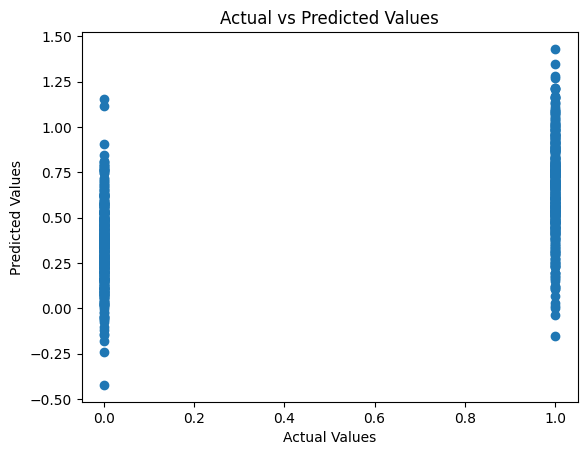

In [ ]:
# Построение линии тренда
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

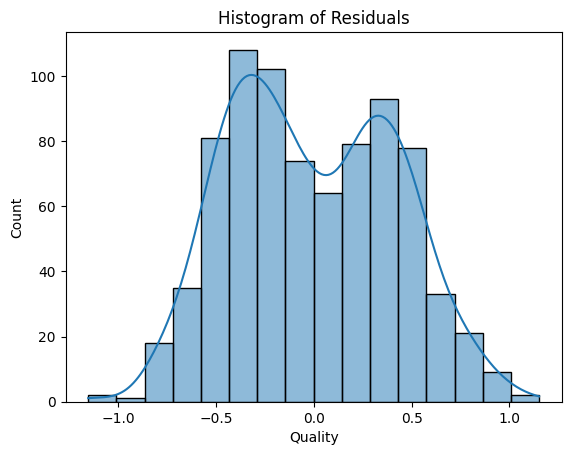

In [ ]:
# Визуализация остатков
residuals = y_test - predictions
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.show()

In [ ]:
# Использование модели для предсказания
needed_columns = ['Size','Weight','Sweetness','Crunchiness','Juiciness','Ripeness','Acidity']
new_data = data_transformed[needed_columns]
res_data = data_transformed['Quality']
new_data

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984
...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720


In [ ]:
new_predictions = model.predict(new_data)
new_predictions

array([0.23802276, 0.17536145, 0.57941868, ..., 0.86838986, 0.38246591,
       0.39854707])

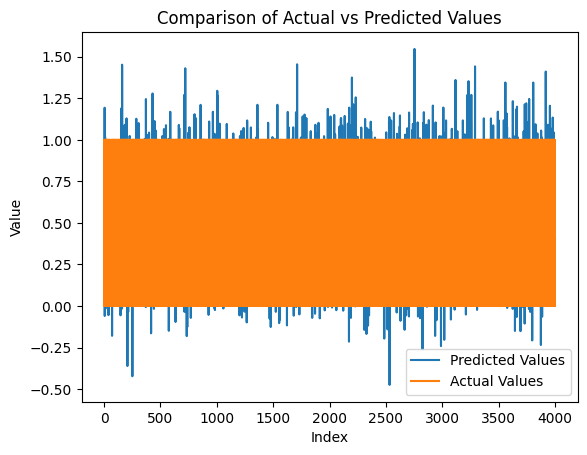

In [ ]:
# Визуализация сравнения реальных и предсказанных значений
plt.plot(new_predictions, label='Predicted Values')
plt.plot(res_data, label='Actual Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Comparison of Actual vs Predicted Values')
plt.legend()
plt.show()

In [ ]:
# bins = [-np.inf, -3, 0, 3, np.inf] # Определяем границы категории
# data_transformed['Juiciness_Numerical'] = pd.cut(data_transformed['Juiciness'], bins=bins, labels=[0, 1, 2, 3]) # Создаем новый столбец сразу с числовыми метками категорий


In [ ]:
# cross_table = pd.crosstab(data_transformed['Juiciness'], data_transformed['Quality'])
# print(cross_table)

In [ ]:
# ct_means = cross_table.mean(axis=0)

# # Вывод средних значений
# print(ct_means)

In [ ]:
# cross_table = pd.crosstab(data_transformed['Juiciness_Numerical'], data_transformed['Quality'])
# print(cross_table)

In [ ]:
# # Подсчет среднего таргета для каждого значения бинарного признака
# mean_target = data.groupby('Quality')['Juiciness'].mean()

# # Вывод средних значений таргета для каждого значения бинарного признака
# print(mean_target)

In [ ]:
# Разделение столбца на интервалы
bins = pd.cut(data_transformed['Juiciness'], bins=4)

# Присвоение числовых значений каждому интервалу
data_transformed['New_Juiciness'] = pd.cut(data_transformed['Juiciness'], bins=4, labels=False)

# Вывод уникальных значений нового столбца
print(data_transformed['New_Juiciness'])

0       2
1       2
2       2
3       2
4       2
       ..
3995    2
3996    1
3997    2
3998    2
3999    2
Name: New_Juiciness, Length: 4000, dtype: int64


In [ ]:
nominal = data_transformed['New_Juiciness']
binary0 = []
binary1 = []
binary2 = []
binary3 = []

In [ ]:
# Проход по каждому значению в столбце
for i in range(0, nominal.count()):
    # Если значение равно 0, добавляем 1 в список binary0 и 0 в остальные списки
    if nominal[i] == 0:
        binary0.append(1)
        binary1.append(0)
        binary2.append(0)
        binary3.append(0)
    # Если значение равно 1, добавляем 1 в список binary1 и 0 в остальные списки
    elif nominal[i] == 1:
        binary0.append(0)
        binary1.append(1)
        binary2.append(0)
        binary3.append(0)
    # Если значение равно 2, добавляем 1 в список binary2 и 0 в остальные списки
    elif nominal[i] == 2:
        binary0.append(0)
        binary1.append(0)
        binary2.append(1)
        binary3.append(0)
    # Если значение равно 3, добавляем 1 в список binary3 и 0 в остальные списки
    elif nominal[i] == 3:
        binary0.append(0)
        binary1.append(0)
        binary2.append(0)
        binary3.append(1)



In [ ]:
# Создание DataFrame из четырех бинарных переменных и столбца 'Size' из исходного DataFrame
predf = {'Juiciness0': binary0,'Juiciness1': binary1, 'Juiciness2': binary2, 'Juiciness3': binary3, 'Size': data_transformed['Size']}
nominal = pd.DataFrame(predf)
nominal

,Juiciness0,Juiciness1,Juiciness2,Juiciness3,Size
0,0,0,1,0,-3.970049
1,0,0,1,0,-1.195217
2,0,0,1,0,-0.292024
3,0,0,1,0,-0.657196
4,0,0,1,0,1.364217
...,...,...,...,...,...
3995,0,0,1,0,0.059386
3996,0,1,0,0,-0.293118
3997,0,0,1,0,-2.634515
3998,0,0,1,0,-4.008004


In [ ]:
from sklearn.metrics import r2_score

# Разделение данных на признаки (x1) и целевую переменную (y1)
x1, y1 = nominal.drop(['Size'], axis=1), nominal['Size']

# Разделение данных на обучающий и тестовый наборы
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2)

# Создание отдельных обучающих наборов для каждого уровня ценности
train_Juiciness0 = y1[nominal['Juiciness0'] == 1]
train_Juiciness1 = y1[nominal['Juiciness1'] == 1]
train_Juiciness2 = y1[nominal['Juiciness2'] == 1]
train_Juiciness3 = y1[nominal['Juiciness3'] == 1]

In [ ]:
train_Juiciness0

5      -3.425400
12     -0.170812
24      0.522961
25     -1.299468
30      0.410492
          ...   
3835    0.139967
3880    1.184317
3904    2.777324
3909   -0.209701
3918   -1.536572
Name: Size, Length: 230, dtype: float64

In [ ]:
# # Сумма таргета

# # Рассчет средних значений 'battery_power' для каждого уровня ценности
# mean0 = sum(train_Juiciness0) / len(train_Juiciness0)
# mean1 = sum(train_Juiciness1) / len(train_Juiciness1)
# mean2 = sum(train_Juiciness2) / len(train_Juiciness2)
# mean3 = sum(train_Juiciness3) / len(train_Juiciness3)

# # Обучение линейной регрессии на данных x1 и y1
# model = LinearRegression()
# model.fit(x1, y1)

# # Предсказания с помощью обученной модели
# y1_pred = model.predict(x1)

# # Рассчет метрик качества модели: R2-оценки и среднеквадратичной ошибки (MSE)
# model_r2 = r2_score(y1, y1_pred)
# model_mean = mean_squared_error(y1, y1_pred)

# # Вывод результатов
# print(f'Linear regression R2 score: {model_r2}')
# print(f'Linear regression MSE: {model_mean}')
# print(f'Coef: {model.coef_}')
# print(f'Intercept: {model.intercept_}')
# print(f'mean: {mean0}')
# print(f'mean: {mean1}')
# print(f'mean: {mean2}')
# print(f'mean: {mean3}')

In [ ]:
# data_transformed

In [ ]:
# X_train

In [ ]:
# итак было закоменнчено
# X_train = X_train.drop('New_Juiciness', axis=1)

In [ ]:
# data_transformed = data_transformed.drop('New_Juiciness', axis=1)

# Полиномиальная регрессия

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [ ]:
# Преобразование признаков в полиномиальные
degree = 3
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [ ]:
# Построение полиномиальной регрессионной модели
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
# Предсказание на тестовом наборе данных
predictions = model.predict(X_test_poly)
predictions

array([ 0.40577918,  0.23551496,  0.52818575,  0.24242702,  0.95618713,
        0.288323  ,  0.9372708 ,  0.73604594,  0.45718262,  0.64789681,
        0.17590321,  0.16052231,  1.08811271,  0.13333059, -0.11146908,
        0.89506373,  0.96340542,  0.82345797,  0.38975196,  0.73499716,
        0.73426811,  1.0059544 ,  0.15603725,  0.07975588,  0.3805118 ,
        0.83922961,  1.02505312,  0.31624099,  0.13169508,  0.83564468,
        0.16540432,  0.60069232,  0.99150016,  1.00150931,  0.44865126,
        0.36011762,  0.96996684, -0.22113169,  0.32696488,  0.57019328,
        0.86586142,  0.68776142,  0.96128964,  0.32890975,  0.80767007,
        0.1547873 ,  0.372117  ,  0.14595225,  0.561103  ,  1.03000086,
        0.15664261,  0.5606951 ,  0.76957841,  0.44519231,  0.31747781,
        0.78413757,  0.93299337,  1.1001757 ,  0.15202126,  0.74210575,
        0.93095312,  0.07028316,  0.53658381,  0.19140048,  0.77858776,
        0.26270928,  0.16620069,  0.00346701,  0.40529501,  0.29

In [ ]:
# Оценка качества модели
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 0.32945838761714547


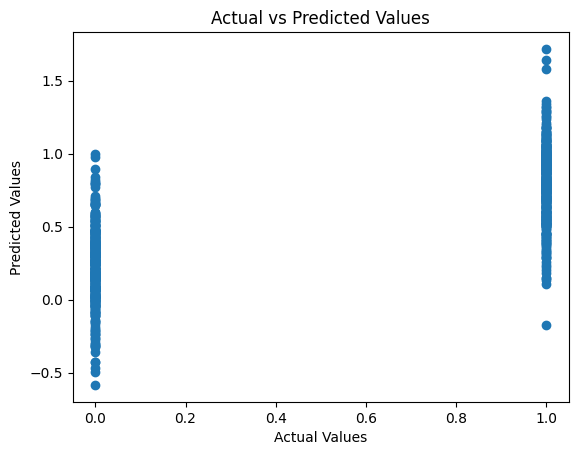

In [ ]:
# Построение линии тренда
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

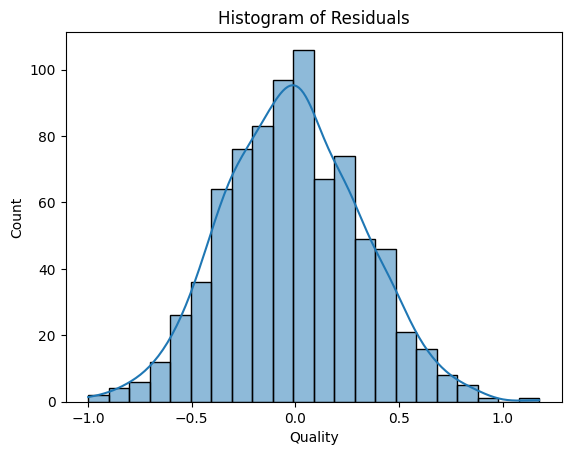

In [ ]:
# Визуализация остатков
residuals = y_test - predictions
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.show()

In [ ]:
new_data_poly = poly_features.transform(new_data)
poly_predictions = model.predict(new_data_poly)

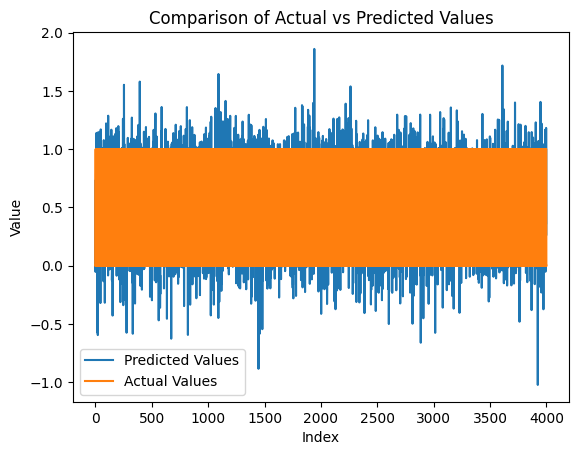

In [ ]:
# Визуализация сравнения реальных и предсказанных значений
plt.plot(poly_predictions, label='Predicted Values')
plt.plot(res_data, label='Actual Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Comparison of Actual vs Predicted Values')
plt.legend()
plt.show()

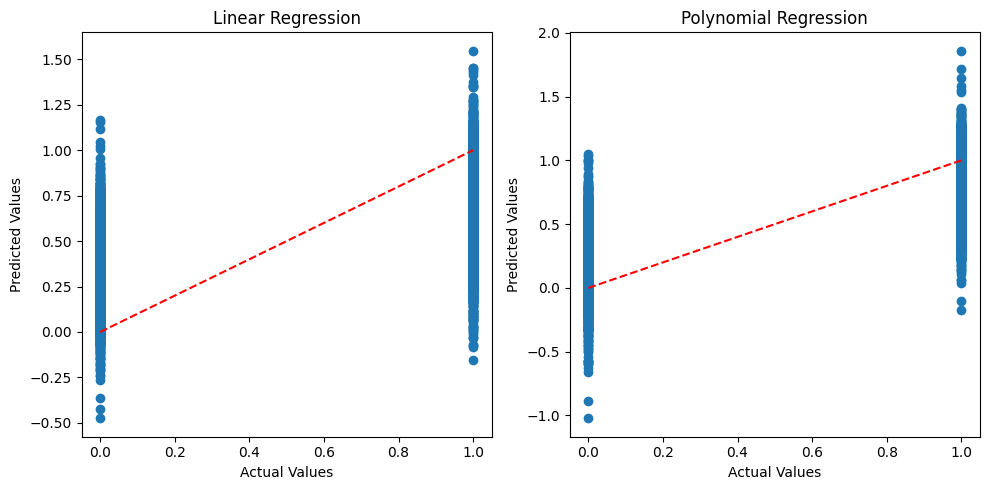

In [ ]:
# Визуализация сравнения реальных и предсказанных значений для линейной регрессии
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(res_data, new_predictions)
plt.plot([min(res_data), max(res_data)], [min(res_data), max(res_data)], '--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression')
plt.subplot(1, 2, 2)
plt.scatter(res_data, poly_predictions)
plt.plot([min(res_data), max(res_data)], [min(res_data), max(res_data)], '--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Polynomial Regression')
plt.tight_layout()
plt.show()

# Логистическая регрессия

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
data

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good


In [ ]:
# Разделение данных на обучающий и тестовый наборы
X= data_transformed.drop(["Quality"],axis=1)
y= data_transformed["Quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Использование модели для предсказания
needed_columns = ['Size','Weight','Sweetness','Crunchiness','Juiciness','Ripeness','Acidity']
new_data = data_transformed[needed_columns]
res_data = data_transformed['Quality']
new_data

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984
...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720


In [ ]:
X_train

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,New_Juiciness
3994,1.482508,-2.581181,-0.306888,1.527877,1.056361,2.560829,-1.229255,2
423,-0.166097,0.385633,-1.102875,0.473802,0.325483,0.983244,-2.171938,1
2991,-2.508892,-2.843436,-0.848363,-0.483352,-0.095337,5.111046,-1.805348,1
1221,-1.380463,-0.521432,3.335713,0.143991,2.513751,-0.466679,-0.030533,2
506,-2.073640,-1.212834,-0.818440,3.808835,1.013863,0.748661,0.026134,2
...,...,...,...,...,...,...,...,...
1130,1.203125,-1.887093,-2.551971,1.080267,3.499233,-0.427477,2.928775,2
1294,-1.697843,-1.791844,-1.332840,0.106406,0.585904,2.301835,-2.856914,1
860,2.464079,-1.672946,-0.270204,-0.060312,-1.367107,4.491704,1.210291,1
3507,-1.680704,-1.174721,1.609465,0.972546,0.358214,0.495325,-0.751745,1


In [ ]:
X_train = X_train.drop('New_Juiciness', axis=1)
X_train

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
3994,1.482508,-2.581181,-0.306888,1.527877,1.056361,2.560829,-1.229255
423,-0.166097,0.385633,-1.102875,0.473802,0.325483,0.983244,-2.171938
2991,-2.508892,-2.843436,-0.848363,-0.483352,-0.095337,5.111046,-1.805348
1221,-1.380463,-0.521432,3.335713,0.143991,2.513751,-0.466679,-0.030533
506,-2.073640,-1.212834,-0.818440,3.808835,1.013863,0.748661,0.026134
...,...,...,...,...,...,...,...
1130,1.203125,-1.887093,-2.551971,1.080267,3.499233,-0.427477,2.928775
1294,-1.697843,-1.791844,-1.332840,0.106406,0.585904,2.301835,-2.856914
860,2.464079,-1.672946,-0.270204,-0.060312,-1.367107,4.491704,1.210291
3507,-1.680704,-1.174721,1.609465,0.972546,0.358214,0.495325,-0.751745


In [ ]:
X_test

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,New_Juiciness
555,3.099411,-1.691561,-3.679364,0.963606,0.538102,1.660099,-0.544761,1
3491,1.439788,-0.223976,-0.061449,1.412705,0.885641,-2.191811,1.952777,2
527,1.206786,-0.508979,1.736207,1.301011,-0.556149,-1.332052,1.009156,1
3925,-1.612077,-1.554690,2.250267,-0.155060,-1.435862,2.388755,-0.487297,1
2989,-1.962900,-0.506961,-2.388917,0.136195,-2.780126,1.623751,-1.636459,0
...,...,...,...,...,...,...,...,...
1922,1.457467,-0.466284,-2.339908,1.003582,-1.391224,-0.647498,-1.618798,1
865,1.850968,-2.905569,-0.681102,-1.229915,2.891594,-0.113403,1.285040,2
3943,-0.865684,-4.366865,2.599850,1.623674,3.183761,1.392612,-1.015782,2
1642,-0.944221,-0.164773,0.487003,-0.105042,-0.044047,1.460337,-2.106325,1


In [ ]:
X_test = X_test.drop('New_Juiciness', axis=1)
X_test

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
555,3.099411,-1.691561,-3.679364,0.963606,0.538102,1.660099,-0.544761
3491,1.439788,-0.223976,-0.061449,1.412705,0.885641,-2.191811,1.952777
527,1.206786,-0.508979,1.736207,1.301011,-0.556149,-1.332052,1.009156
3925,-1.612077,-1.554690,2.250267,-0.155060,-1.435862,2.388755,-0.487297
2989,-1.962900,-0.506961,-2.388917,0.136195,-2.780126,1.623751,-1.636459
...,...,...,...,...,...,...,...
1922,1.457467,-0.466284,-2.339908,1.003582,-1.391224,-0.647498,-1.618798
865,1.850968,-2.905569,-0.681102,-1.229915,2.891594,-0.113403,1.285040
3943,-0.865684,-4.366865,2.599850,1.623674,3.183761,1.392612,-1.015782
1642,-0.944221,-0.164773,0.487003,-0.105042,-0.044047,1.460337,-2.106325


In [ ]:
# Построение логистической регрессионной модели
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=100000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

 model.coef_ это атрибут объекта модели LogisticRegression, который содержит коэффициенты, соответствующие независимым переменным. Каждый элемент этого массива представляет коэффициент перед соответствующей независимой переменной в модели логистической регрессии.

In [ ]:
print("Коэффициенты:", model.coef_)

Коэффициенты: [[-0.6498624  -0.26319718 -0.58495517 -0.02430555 -0.44401959  0.12757976
   0.31872812]]


model.intercept_ это атрибут объекта модели LogisticRegression, который содержит перехват (intercept), также известный как свободный член. Это значение представляет константное смещение в модели логистической регрессии, которое используется при вычислении логарифма шансов. Перехват обычно представляет базовый уровень или вероятность события при нулевых значениях всех независимых переменных.

In [ ]:
print("Перехват (intercept):", model.intercept_)

Перехват (intercept): [-0.65239925]


In [ ]:
# import statsmodels.api as sm
# simple_fit = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial())
# result = simple_fit.fit()

# print(result.params)

строим таблицу тейбл кросс для таргета и номинального фича
по нему вручую считаем шансы выздороветь шансы у межчин к шанса выздороветь у женщин (как в презентации)


In [ ]:
# counts = data_transformed['Quality'].value_counts()
# counts

In [ ]:
# import math
# odds=1996/2004
# odds

In [ ]:
# print(math.log(odds))

In [ ]:
# X_test


In [ ]:
# X_test = X_test.drop('New_Juiciness', axis=1)
# X_test

In [ ]:
# Предсказание на тестовом наборе данных
predictions = model.predict(X_test)
predictions

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,

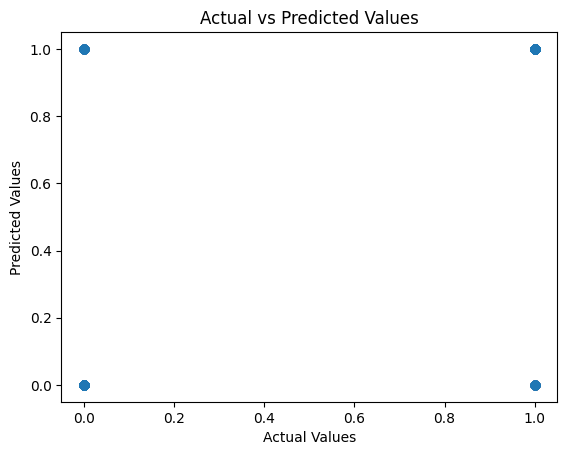

In [ ]:
# Построение линии тренда
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

Precision (точность) измеряет долю правильно предсказанных положительных классов из всех объектов, которые модель предсказала как положительные.

Recall (полнота) измеряет долю правильно предсказанных положительных классов из всех реально принадлежащих к положительному классу объектов.

F1-score представляет собой гармоническое среднее между precision и recall и является сбалансированной метрикой, которая учитывает как точность, так и полноту.

In [ ]:
# Оценка качества модели
accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', accuracy)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))


Accuracy: 0.75375
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       399
           1       0.75      0.76      0.75       401

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800

[[300  99]
 [ 98 303]]


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(rmse)

0.4962358310319802


In [ ]:
data_transformed

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality,New_Juiciness
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,0,2
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,0,2
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,1,2
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,0,2
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,0,2
...,...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,1,2
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,0,1
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,1,2
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,0,2


In [ ]:
data_transformed = data_transformed.drop('New_Juiciness', axis=1)

In [ ]:
data_transformed

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,0
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,0
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,1
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,0
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,0
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,1
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,0
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,1
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,0


In [ ]:
new_data

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984
...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720


In [ ]:
new_data_logist = new_data
new_data_logist

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984
...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720


In [ ]:
logist_predictions = model.predict(new_data_logist)

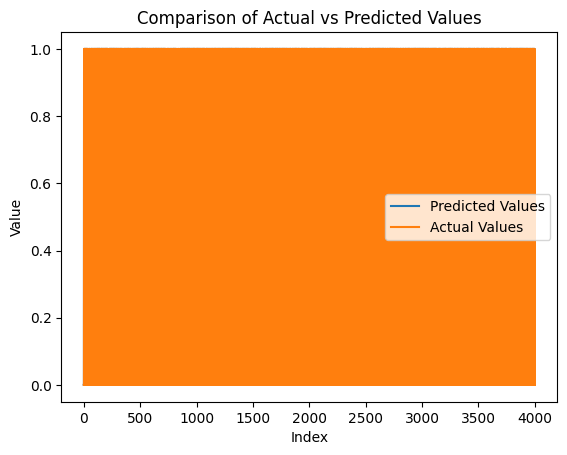

In [ ]:
# Визуализация сравнения реальных и предсказанных значений
plt.plot(logist_predictions, label='Predicted Values')
plt.plot(res_data, label='Actual Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Comparison of Actual vs Predicted Values')
plt.legend()
plt.show()

plt.plot по умолчанию соединяет точки линиями, что может создать впечатление заполненного графика. Чтобы правильно визуализировать данные, можно использовать точки вместо линий.

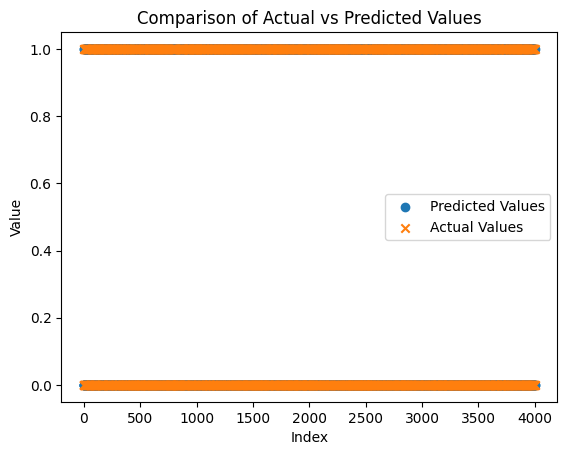

In [ ]:
# Визуализация данных с использованием точек
plt.scatter(range(len(logist_predictions)), logist_predictions, label='Predicted Values', marker='o')
plt.scatter(range(len(res_data)), res_data, label='Actual Values', marker='x')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Comparison of Actual vs Predicted Values')
plt.legend()
plt.show()

Сравним значения коэффициентов и средних класса фича - Juiciness

In [ ]:
# Присвоение числовых значений каждому интервалу
data_transformed['New_Juiciness'] = pd.cut(data_transformed['Juiciness'], bins=4, labels=False)
data_transformed


,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality,New_Juiciness
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,0,2
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,0,2
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,1,2
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,0,2
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,0,2
...,...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,1,2
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,0,1
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,1,2
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,0,2


In [ ]:
# Вывод уникальных значений нового столбца
print(data_transformed['New_Juiciness'])

0       2
1       2
2       2
3       2
4       2
       ..
3995    2
3996    1
3997    2
3998    2
3999    2
Name: New_Juiciness, Length: 4000, dtype: int64


In [ ]:
nominal

,Juiciness0,Juiciness1,Juiciness2,Juiciness3,Size
0,0,0,1,0,-3.970049
1,0,0,1,0,-1.195217
2,0,0,1,0,-0.292024
3,0,0,1,0,-0.657196
4,0,0,1,0,1.364217
...,...,...,...,...,...
3995,0,0,1,0,0.059386
3996,0,1,0,0,-0.293118
3997,0,0,1,0,-2.634515
3998,0,0,1,0,-4.008004


In [ ]:
X_nominal = nominal[['Juiciness0', 'Juiciness1', 'Juiciness2','Juiciness3']]
y_nominal = data_transformed['Quality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_nominal, y_nominal, test_size=0.2, random_state=42)

In [ ]:
X_train

,Juiciness0,Juiciness1,Juiciness2,Juiciness3
3994,0,0,1,0
423,0,1,0,0
2991,0,1,0,0
1221,0,0,1,0
506,0,0,1,0
...,...,...,...,...
1130,0,0,1,0
1294,0,1,0,0
860,0,1,0,0
3507,0,1,0,0


In [ ]:
# Создание отдельных обучающих наборов для каждого уровня ценности
train_Juiciness0 = y_nominal[nominal['Juiciness0'] == 1]
train_Juiciness1 = y_nominal[nominal['Juiciness1'] == 1]
train_Juiciness2 = y_nominal[nominal['Juiciness2'] == 1]
train_Juiciness3 = y_nominal[nominal['Juiciness3'] == 1]

In [ ]:
# Сумма таргета

# Рассчет средних значений 'battery_power' для каждого уровня ценности
mean0 = sum(train_Juiciness0) / len(train_Juiciness0)
mean1 = sum(train_Juiciness1) / len(train_Juiciness1)
mean2 = sum(train_Juiciness2) / len(train_Juiciness2)
mean3 = sum(train_Juiciness3) / len(train_Juiciness3)

# Обучение линейной регрессии на данных x1 и y1
model = LogisticRegression()
model.fit(X_nominal, y_nominal)

# Предсказания с помощью обученной модели
y_nominal_pred = model.predict(X_nominal)

# Рассчет метрик качества модели: R2-оценки и среднеквадратичной ошибки (MSE)
model_r2 = r2_score(y_nominal, y_nominal_pred)
model_mean = mean_squared_error(y_nominal, y_nominal_pred)

# Вывод результатов
print(f'Logistic regression R2 score: {model_r2}')
print(f'Logistic regression MSE: {model_mean}')
print(f'Coef: {model.coef_}')
print(f'Intercept: {model.intercept_}')
print(f'mean: {mean0}')
print(f'mean: {mean1}')
print(f'mean: {mean2}')
print(f'mean: {mean3}')

Logistic regression R2 score: -0.5840063360253442
Logistic regression MSE: 0.396
Coef: [[ 1.37647462 -0.06172436 -0.79663847 -0.51813834]]
Intercept: [0.32853845]
mean: 0.8521739130434782
mean: 0.5662778366914104
mean: 0.38461538461538464
mean: 0.4482758620689655


In [ ]:
df2 = pd.crosstab(X_nominal,y_nominal)
df2

ValueError: Data must be 1-dimensional, got ndarray of shape (4000, 4) instead

In [ ]:
# model = LogisticRegression(max_iter=100000)
# model.fit(X_train, y_train)

In [ ]:
# Предсказание на тестовом наборе данных
predictions = model.predict(X_test)
predictions

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,

In [ ]:
# Оценка качества модели
accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', accuracy)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

Accuracy: 0.61
              precision    recall  f1-score   support

           0       0.62      0.56      0.59       399
           1       0.60      0.66      0.63       401

    accuracy                           0.61       800
   macro avg       0.61      0.61      0.61       800
weighted avg       0.61      0.61      0.61       800

[[223 176]
 [136 265]]


In [ ]:
new_data_logist

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984
...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720


In [ ]:
X_nominal

,Juiciness0,Juiciness1,Juiciness2,Juiciness3
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
3995,0,0,1,0
3996,0,1,0,0
3997,0,0,1,0
3998,0,0,1,0


In [ ]:
logist_predictions = model.predict(X_nominal)

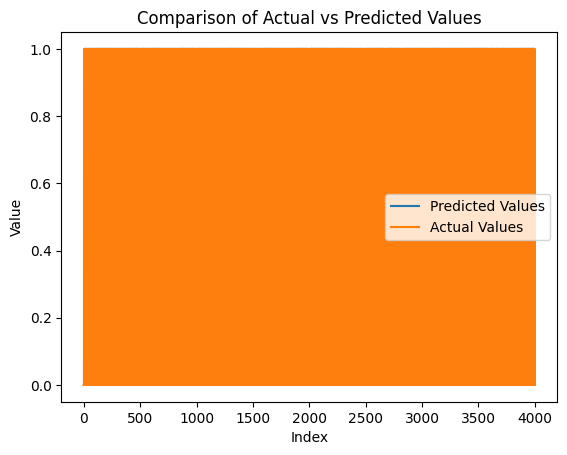

In [ ]:
# Визуализация сравнения реальных и предсказанных значений
plt.plot(logist_predictions, label='Predicted Values')
plt.plot(res_data, label='Actual Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Comparison of Actual vs Predicted Values')
plt.legend()
plt.show()

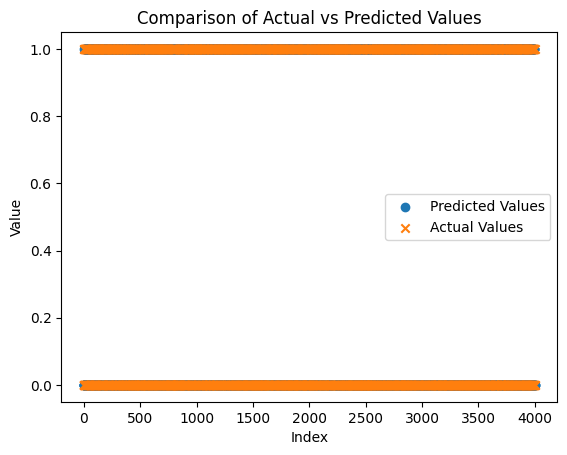

In [ ]:
# Визуализация данных с использованием точек
plt.scatter(range(len(logist_predictions)), logist_predictions, label='Predicted Values', marker='o')
plt.scatter(range(len(res_data)), res_data, label='Actual Values', marker='x')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Comparison of Actual vs Predicted Values')
plt.legend()
plt.show()